## Business Context

This dataset pertains to residential properties in Ames, Iowa, and is aimed at modeling or predicting house sale prices. The goal of such a predictive model is to estimate the property's sale price based on various attributes such as location, size, condition, and amenities. This could be useful for:

Real Estate Valuation: Real estate agencies and appraisers can use this model to estimate property values accurately, aiding in setting competitive listing prices.
Investment Analysis: Investors can assess the potential profitability of buying, renovating, and selling properties by predicting future sale prices.
Buyer Assistance: Helping potential buyers make informed decisions by providing estimated values for properties they are interested in. Property Tax Assessment:** Local governments could use the model to estimate property values for more accurate property tax assessments.
Market Trend Analysis: Identifying market trends and patterns in property prices across different neighborhoods and property types.
Customized Marketing: Real estate companies can tailor marketing strategies based on property features and target suitable buyer segments.

## Packages and Libraries

In [292]:
pip install xgboost

In [293]:
import pandas as pd 
import pathlib
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

## import data

In [465]:
def read_file(file_name : str )  -> pd.DataFrame:
    """
    summary
    """
    try:
        dir_folder = pathlib.Path().cwd().parent
        print(dir_folder)
        file_path  = dir_folder / "data" 
        print(file_path)
        df = pd.read_csv(os.path.join(file_path/file_name))
        return df
    except FileNotFoundError:
        print(f"Error: The file at '{file_name}' was not found.")
        raise
    except Exception as e:
        print(f"An error occurred: {e}")
        
        
        
df = read_file('E:/machine_learning_project/machine_learning_cour2/ames.csv')      
df.head()   

e:\machine_learning_project
e:\machine_learning_project\data


,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,NaN,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,NaN,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,NaN,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,NaN,0,3,2010,WD,Normal,189900,-93.638933,42.060899


## data structure  

In [466]:
def data_diagnostic(df):
        print("#"*50)
        print(df.info())
        print("#"*50)
        print("The number of total rows  {x: .0f} ".format(x=df.shape[0]))
        print("The number of total variables {x: .0f} ".format(x=df.shape[1]))
        print("The variables names {x:} ".format(x=list(df.columns.values)))

        column_headers =list(df.columns.values)
        qualitative_columns = [col for col in column_headers if df[col].dtype=="object"]
        quantitative_columns = [col for col in column_headers if df[col].dtype in ['int64', 'float64']]

        print("The qualitative variables {x:} ".format(x=qualitative_columns))
        print("The quantitative variables {x:} ".format(x=quantitative_columns))
        print("#"*50)
        print("Total number missing value {x:} ".format(x=df.isnull().sum()))

In [467]:
df

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,NaN,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,NaN,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,NaN,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,NaN,0,3,2010,WD,Normal,189900,-93.638933,42.060899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Split_or_Multilevel,Residential_Low_Density,37,7937,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,CulDSac,...,Good_Privacy,NaN,0,3,2006,WD,Normal,142500,-93.604776,41.988964
2926,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0,8885,Pave,No_Alley_Access,Slightly_Irregular,Low,AllPub,Inside,...,Minimum_Privacy,NaN,0,6,2006,WD,Normal,131000,-93.602680,41.988314
2927,Split_Foyer,Residential_Low_Density,62,10441,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,Shed,700,7,2006,WD,Normal,132000,-93.606847,41.986510
2928,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,77,10010,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,4,2006,WD,Normal,170000,-93.600190,41.990921


In [468]:
data_diagnostic(df)

##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 74 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MS_SubClass         2930 non-null   object 
 1   MS_Zoning           2930 non-null   object 
 2   Lot_Frontage        2930 non-null   int64  
 3   Lot_Area            2930 non-null   int64  
 4   Street              2930 non-null   object 
 5   Alley               2930 non-null   object 
 6   Lot_Shape           2930 non-null   object 
 7   Land_Contour        2930 non-null   object 
 8   Utilities           2930 non-null   object 
 9   Lot_Config          2930 non-null   object 
 10  Land_Slope          2930 non-null   object 
 11  Neighborhood        2930 non-null   object 
 12  Condition_1         2930 non-null   object 
 13  Condition_2         2930 non-null   object 
 14  Bldg_Type           2930 non-null   object 
 15  Hous

In [469]:
def na(df, percent = True):
    srs = df.isna().sum()[df.isna().sum() > 0]
    srs = srs.sort_values(ascending=False)
    if percent:
        print('% of NaNs in df:')
        return srs / df.shape[0]
    else:
        print('# of NaNs in df:')
        return srs

na(df, False)

# of NaNs in df:


Misc_Feature    2824
Mas_Vnr_Type    1775
dtype: int64

In [470]:
def na(df, percent = True, verbose = True):
    srs = df.isna().sum()[df.isna().sum() > 0]
    srs = srs.sort_values(ascending=False)
    if percent:
        if verbose:
            print('% of NaNs in df:')
        return srs / df.shape[0]
    else:
        if verbose:
            print('# of NaNs in df:')
        return srs

na(df, False)

# of NaNs in df:


Misc_Feature    2824
Mas_Vnr_Type    1775
dtype: int64

Misc_Feature    96.382253
Mas_Vnr_Type    60.580205
dtype: float64


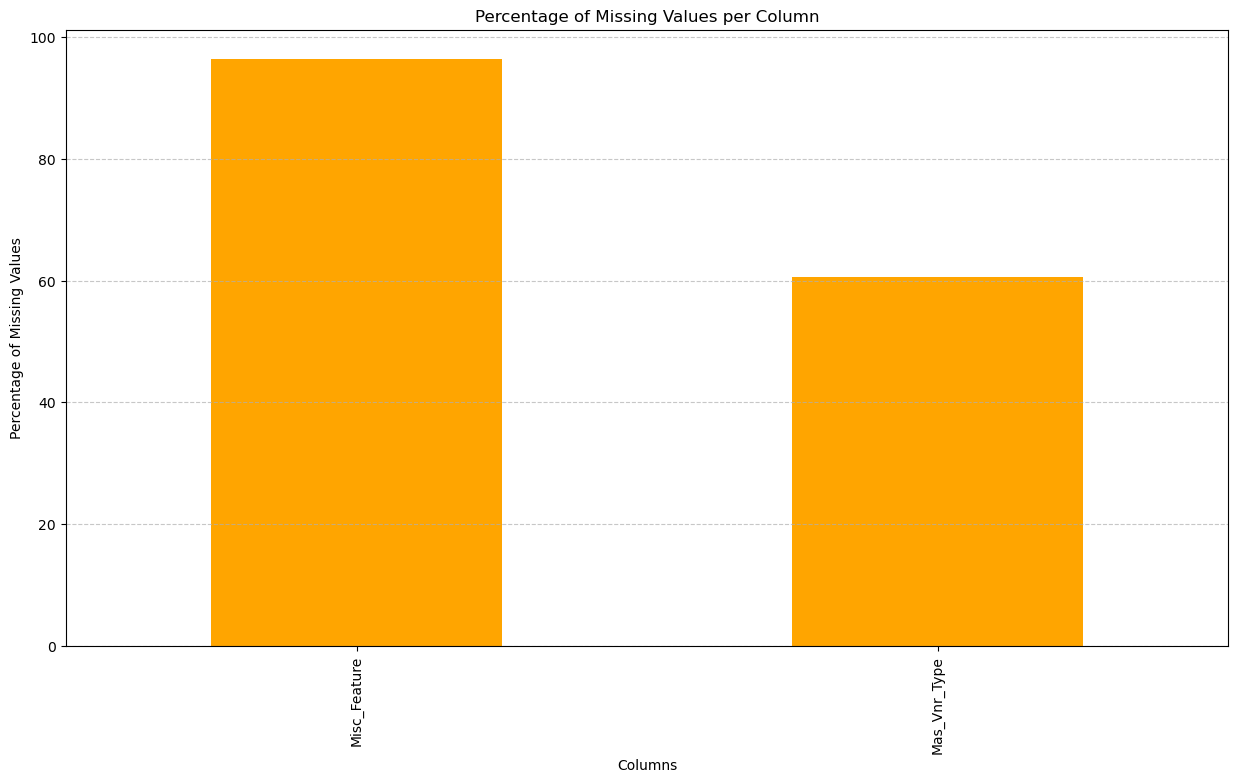

In [471]:
#Calculate the percentage of NaNs per column
na_percentage = (df.isna().sum() / len(df)) * 100

# Filter out columns with no missing values
na_percentage = na_percentage[na_percentage > 0]

# Sort by the percentage of missing values
na_percentage = na_percentage.sort_values(ascending=False)
print(na_percentage)
# Plot the percentage of missing values
plt.figure(figsize=(15, 8))
na_percentage.plot(kind='bar', color='orange')
plt.title('Percentage of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## analyse univary

### Numerical varaiables

In [19]:
dtypes = df.dtypes.to_frame().reset_index()
dtypes.columns = ['col', 'dtype']
print('Df dtypes:')
dtypes.groupby('dtype').size()

Df dtypes:


dtype
int64      32
float64     2
object     40
dtype: int64

In [ ]:
def numeric_analysis(df):
        return print(df.describe().T)
numeric_analysis(df)

                     count           mean           std           min  \
Lot_Frontage        2930.0      57.647782     33.499441      0.000000   
Lot_Area            2930.0   10147.921843   7880.017759   1300.000000   
Year_Built          2930.0    1971.356314     30.245361   1872.000000   
Year_Remod_Add      2930.0    1984.266553     20.860286   1950.000000   
Mas_Vnr_Area        2930.0     101.096928    178.634545      0.000000   
BsmtFin_SF_1        2930.0       4.177474      2.233372      0.000000   
BsmtFin_SF_2        2930.0      49.705461    169.142089      0.000000   
Bsmt_Unf_SF         2930.0     559.071672    439.540571      0.000000   
Total_Bsmt_SF       2930.0    1051.255631    440.968018      0.000000   
First_Flr_SF        2930.0    1159.557679    391.890885    334.000000   
Second_Flr_SF       2930.0     335.455973    428.395715      0.000000   
Gr_Liv_Area         2930.0    1499.690444    505.508887    334.000000   
Bsmt_Full_Bath      2930.0       0.431058      0.52

#### Numerical varaiables visualization

In [22]:
def univariate_analysis(df, base_folder="univariate_analysis"):
        # Ensure the base folder exists
        if not os.path.exists(base_folder):
            os.makedirs(base_folder)
        
        # Select numeric columns
        numeric_cols = df.select_dtypes(include=['number']).columns
        
        for col in numeric_cols:
            # Create a folder for the analysis
            col_folder = os.path.join(base_folder, col)
            if not os.path.exists(col_folder):
                os.makedirs(col_folder)
            
            print(f"\nPerforming Univariate Analysis for: {col}")
            
            # Create a single figure with 2x2 layout
            fig, axes = plt.subplots(2, 2, figsize=(12, 10))
            fig.suptitle(f'Univariate Analysis for {col}', fontsize=16)
            
            # Bar Chart
            sns.barplot(
                x=df[col].value_counts().index, 
                y=df[col].value_counts().values, 
                palette="viridis", 
                ax=axes[0, 0]
            )
            axes[0, 0].set_title('Bar Chart')
            axes[0, 0].set_xlabel(col)
            axes[0, 0].set_ylabel('Frequency')
            
            # Box Plot
            sns.boxplot(y=df[col], palette="viridis", ax=axes[0, 1])
            axes[0, 1].set_title('Box Plot')
            axes[0, 1].set_xlabel(col)
            
            # Density Plot
            sns.kdeplot(df[col], fill=True, color="blue", alpha=0.6, ax=axes[1, 0])
            axes[1, 0].set_title('Density Plot')
            axes[1, 0].set_xlabel(col)
            axes[1, 0].set_ylabel('Density')
            
            # Histogram
            sns.histplot(df[col], kde=False, color="green", ax=axes[1, 1])
            axes[1, 1].set_title('Histogram')
            axes[1, 1].set_xlabel(col)
            axes[1, 1].set_ylabel('Frequency')
            
            # Adjust layout
            plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make room for the main title
            
            # Save the combined plot
            combined_plot_path = os.path.join(col_folder, f"{col}_univariate_analysis.png")
            plt.savefig(combined_plot_path, bbox_inches='tight')
            plt.close()
            
            print(f"Combined plots for {col} saved in: {combined_plot_path}")

In [ ]:
univariate_analysis(df, base_folder="univariate_analysis")

### Categorical varaiables



In [24]:
def categorical_analysis(df):
    return print(df.select_dtypes(include='object').describe().T)
categorical_analysis(df)

               count unique                                  top  freq
MS_SubClass     2930     16  One_Story_1946_and_Newer_All_Styles  1079
MS_Zoning       2930      7              Residential_Low_Density  2273
Street          2930      2                                 Pave  2918
Alley           2930      3                      No_Alley_Access  2732
Lot_Shape       2930      4                              Regular  1859
Land_Contour    2930      4                                  Lvl  2633
Utilities       2930      3                               AllPub  2927
Lot_Config      2930      5                               Inside  2140
Land_Slope      2930      3                                  Gtl  2789
Neighborhood    2930     28                           North_Ames   443
Condition_1     2930      9                                 Norm  2522
Condition_2     2930      8                                 Norm  2900
Bldg_Type       2930      5                               OneFam  2425
House_

#### Categorical varaiables visualization

In [25]:
def univariate_analysis_categorical(df, base_folder="univariate_analysis_categorical"):
    # Ensure the base folder exists
    if not os.path.exists(base_folder):
        os.makedirs(base_folder)
    
    # Select categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    for col in categorical_cols:
        # Create a folder for the analysis
        col_folder = os.path.join(base_folder, col)
        if not os.path.exists(col_folder):
            os.makedirs(col_folder)
        
        print(f"\nPerforming Univariate Analysis for: {col}")
        
        # Create a figure with 1x2 layout
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        fig.suptitle(f'Univariate Analysis for {col}', fontsize=16)
        
        # Bar Plot
        sns.countplot(x=df[col], palette="viridis", ax=axes[0])
        axes[0].set_title('Count Plot')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Frequency')
        axes[0].tick_params(axis='x', rotation=45)
        
        # Pie Chart
        df[col].value_counts().plot.pie(
            autopct='%1.1f%%', 
            colors=sns.color_palette("viridis", len(df[col].unique())),
            ax=axes[1], 
            startangle=90
        )
        axes[1].set_title('Pie Chart')
        axes[1].set_ylabel('')  # Remove y-label for better visualization
        
        # Adjust layout
        plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make room for the main title
        
        # Save the combined plot
        combined_plot_path = os.path.join(col_folder, f"{col}_univariate_analysis.png")
        plt.savefig(combined_plot_path, bbox_inches='tight')
        plt.close()
        
        print(f"Combined plots for {col} saved in: {combined_plot_path}")
univariate_analysis_categorical(df, base_folder="univariate_analysis_categorical")


Performing Univariate Analysis for: MS_SubClass
Combined plots for MS_SubClass saved in: univariate_analysis_categorical\MS_SubClass\MS_SubClass_univariate_analysis.png

Performing Univariate Analysis for: MS_Zoning
Combined plots for MS_Zoning saved in: univariate_analysis_categorical\MS_Zoning\MS_Zoning_univariate_analysis.png

Performing Univariate Analysis for: Street
Combined plots for Street saved in: univariate_analysis_categorical\Street\Street_univariate_analysis.png

Performing Univariate Analysis for: Alley
Combined plots for Alley saved in: univariate_analysis_categorical\Alley\Alley_univariate_analysis.png

Performing Univariate Analysis for: Lot_Shape
Combined plots for Lot_Shape saved in: univariate_analysis_categorical\Lot_Shape\Lot_Shape_univariate_analysis.png

Performing Univariate Analysis for: Land_Contour
Combined plots for Land_Contour saved in: univariate_analysis_categorical\Land_Contour\Land_Contour_univariate_analysis.png

Performing Univariate Analysis for:

## Multyvarie Analysis

In [32]:
target = 'Sale_Price'

### multivariate analysis with respect to the target variable

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor

def multivariate_analysis(target, df, base_folder="multivariate_analysis", sample_frac=0.2):
    """
    Performs multivariate analysis with respect to the target variable.
    Outputs:
        - Categorical vs Target: Histograms with Density Curves separately by modality.
        - Numeric vs Target: Scatter plots with Density Curves separately by modality.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
        target (str): The target variable for comparison.
        base_folder (str): Directory to save the analysis images.
        sample_frac (float): Fraction of data to sample for faster plotting.
    """
    # Ensure the base folder exists
    if not os.path.exists(base_folder):
        os.makedirs(base_folder)
    
    # --- Categorical vs Target ---
    cat_vs_target_folder = os.path.join(base_folder, "categorical_vs_target")
    if not os.path.exists(cat_vs_target_folder):
        os.makedirs(cat_vs_target_folder)
    
    # Select categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    def plot_categorical_vs_target(col):
        print(f"\nAnalyzing Categorical vs Target: {target} vs {col}")
        
        # Create a grid of histograms by modality of the categorical variable
        modalities = df[col].unique()
        n_modalities = len(modalities)
        fig, axes = plt.subplots(1, n_modalities, figsize=(6 * n_modalities, 6), sharey=True)
        
        if n_modalities == 1:
            axes = [axes]  # To handle single modality case
        
        for i, modality in enumerate(modalities):
            subset = df[df[col] == modality]
            sns.histplot(
                subset[target], kde=True, ax=axes[i], alpha=0.6, color='skyblue'
            )
            axes[i].set_title(f'{col} = {modality}')
            axes[i].set_xlabel(target)
            axes[i].set_ylabel('Frequency')
        
        plt.suptitle(f'{target} Distribution by {col} (Separate by Modality)', fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for main title
        
        # Save plot
        plot_path = os.path.join(cat_vs_target_folder, f"{target}_vs_{col}.png")
        plt.savefig(plot_path, bbox_inches='tight')
        plt.close()
        print(f"Categorical vs Target (Histograms) saved in: {plot_path}")
    
    # Parallelize the plotting for categorical vs target
    with ThreadPoolExecutor() as executor:
        executor.map(plot_categorical_vs_target, categorical_cols)
    
    # --- Numeric vs Target ---
    num_vs_target_folder = os.path.join(base_folder, "numeric_vs_target")
    if not os.path.exists(num_vs_target_folder):
        os.makedirs(num_vs_target_folder)
    
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=['float64','int64']).columns
    
    def plot_numeric_vs_target(col):
        print(f"\nAnalyzing Numeric vs Target: {target} vs {col}")
        
        # Sample the data for faster plotting
        sampled_df = df.sample(frac=sample_frac, random_state=42)
        
        # Create a grid of scatter plots by modality of the target variable
        modalities = sampled_df[target].unique()
        n_modalities = len(modalities)
        fig, axes = plt.subplots(1, n_modalities, figsize=(6 * n_modalities, 6), sharey=True)
        
        if n_modalities == 1:
            axes = [axes]  # To handle single modality case
        
        for i, modality in enumerate(modalities):
            subset = sampled_df[sampled_df[target] == modality]
            sns.scatterplot(
                x=target, y=col, data=subset, ax=axes[i], alpha=0.4, color='purple'
            )
            sns.kdeplot(
                data=subset, x=target, y=col, ax=axes[i], color="red", levels=3, linewidths=1
            )
            axes[i].set_title(f'{target} = {modality}')
            axes[i].set_xlabel(target)
            axes[i].set_ylabel(col)
        
        plt.suptitle(f'{target} vs {col} (Scatter + Density by Modality)', fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for main title
        
        # Save plot
        plot_path = os.path.join(num_vs_target_folder, f"{target}_vs_{col}.png")
        plt.savefig(plot_path, bbox_inches='tight')
        plt.close()
        
        print(f"Numeric vs Target (Scatter + Density) saved in: {plot_path}")
    
    # Parallelize the plotting for numeric vs target
    with ThreadPoolExecutor() as executor:
        executor.map(plot_numeric_vs_target, numeric_cols)
multivariate_analysis(target,df,base_folder="multivariate_analysis")

### Multyvarie Analysis advanced

In [43]:
def scatter_plot_combinations(target, df, base_folder="scatter_combinations"):
    """
    Generates scatter plots for all possible combinations between the target variable,
    one categorical variable, and one numerical variable.
    Outputs:
        - Scatter plots showing the relationship between target and numerical variable,
          colored by the categories of the categorical variable.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
        target (str): The target variable for comparison.
        base_folder (str): Directory to save the scatter plots.
    """
    # Ensure the base folder exists
    if not os.path.exists(base_folder):
        os.makedirs(base_folder)
    
    # Select categorical and numeric columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    # Iterate through all combinations of categorical and numerical variables
    for cat_col in categorical_cols:
        if cat_col != target:  # Skip the target itself
            for num_col in numeric_cols:
                if num_col != target:  # Skip the target itself
                    print(f"\nCreating Scatter Plot: Target={target}, Categorical={cat_col}, Numerical={num_col}")
                    
                    # Plot
                    plt.figure(figsize=(10, 6))
                    sns.scatterplot(
                        x=num_col, 
                        y=target, 
                        hue=cat_col, 
                        data=df, 
                        palette="viridis", 
                        alpha=0.6
                    )
                    plt.title(f'{target} vs {num_col} by {cat_col}')
                    plt.xlabel(num_col)
                    plt.ylabel(target)
                    plt.legend(title=cat_col)
                    
                    # Save plot
                    plot_folder = os.path.join(base_folder, f"{target}_vs_{num_col}_by_{cat_col}")
                    if not os.path.exists(plot_folder):
                        os.makedirs(plot_folder)
                    plot_path = os.path.join(plot_folder, f"{target}_vs_{num_col}_by_{cat_col}.png")
                    plt.savefig(plot_path, bbox_inches='tight')
                    plt.close()
                    
                    print(f"Scatter Plot saved in: {plot_path}")


Creating Scatter Plot: Target=Sale_Price, Categorical=MS_SubClass, Numerical=Lot_Frontage
Scatter Plot saved in: scatter_combinations\Sale_Price_vs_Lot_Frontage_by_MS_SubClass\Sale_Price_vs_Lot_Frontage_by_MS_SubClass.png

Creating Scatter Plot: Target=Sale_Price, Categorical=MS_SubClass, Numerical=Lot_Area
Scatter Plot saved in: scatter_combinations\Sale_Price_vs_Lot_Area_by_MS_SubClass\Sale_Price_vs_Lot_Area_by_MS_SubClass.png

Creating Scatter Plot: Target=Sale_Price, Categorical=MS_SubClass, Numerical=Year_Built
Scatter Plot saved in: scatter_combinations\Sale_Price_vs_Year_Built_by_MS_SubClass\Sale_Price_vs_Year_Built_by_MS_SubClass.png

Creating Scatter Plot: Target=Sale_Price, Categorical=MS_SubClass, Numerical=Year_Remod_Add
Scatter Plot saved in: scatter_combinations\Sale_Price_vs_Year_Remod_Add_by_MS_SubClass\Sale_Price_vs_Year_Remod_Add_by_MS_SubClass.png

Creating Scatter Plot: Target=Sale_Price, Categorical=MS_SubClass, Numerical=Mas_Vnr_Area
Scatter Plot saved in: scatte

KeyboardInterrupt: 

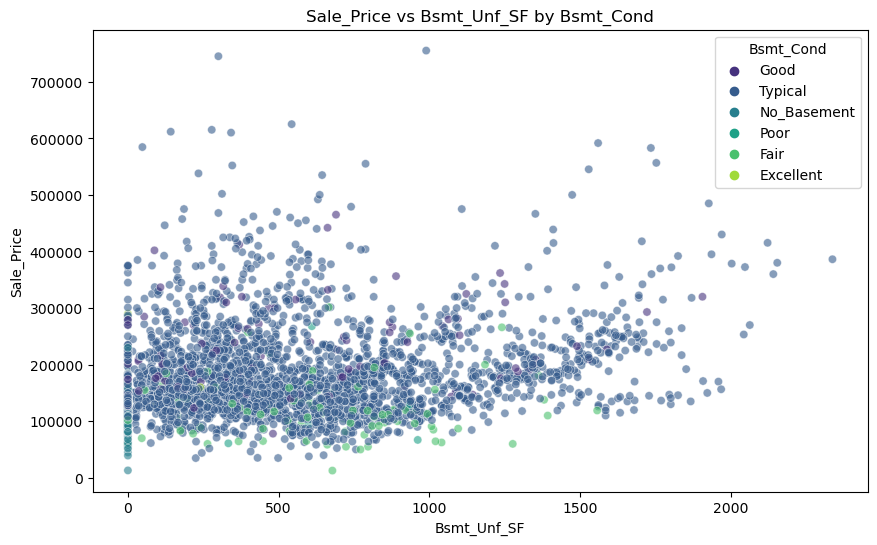

In [44]:
scatter_plot_combinations(target, df, base_folder="scatter_combinations")

### Correlation matrix

In [48]:
def correlation_and_significance(df, base_folder="correlation_analysis"):
    """
    Generates a correlation matrix heatmap with significance markers.
    Outputs:
        - Correlation Matrix with significance points (red = not significant, green = significant)
    
    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
        base_folder (str): Directory to save the analysis images.
    """
    # Ensure the base folder exists
    if not os.path.exists(base_folder):
        os.makedirs(base_folder)
    
    # Select only numerical columns
    numeric_df = df.select_dtypes(include=['number'])
    cols = numeric_df.columns
    
    # Calculate the correlation matrix
    corr_matrix = numeric_df.corr()
    
    # Initialize p-value matrix
    p_values = pd.DataFrame(np.ones((len(cols), len(cols))), columns=cols, index=cols)
    
    # Calculate p-values for each pair of variables
    for row in cols:
        for col in cols:
            if row != col:
                _, p_value = pearsonr(numeric_df[row], numeric_df[col])
                p_values.loc[row, col] = p_value
    
    # --- Plot Correlation Matrix with Significance ---
    plt.figure(figsize=(14, 12))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    
    # Add significance markers
    for i in range(len(cols)):
        for j in range(len(cols)):
            if i != j:  # Skip diagonal
                p_val = p_values.iloc[i, j]
                x = j + 0.5
                y = i + 0.5
                
                # Significant if p-value < 0.05
                if p_val < 0.05:
                    plt.plot(x, y, 'o', color='green')  # Green for significant
                else:
                    plt.plot(x, y, 'o', color='red')    # Red for not significant
    
    plt.title('Correlation Matrix with Significance (Numerical Variables)', fontsize=18)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    
    # Save Correlation Matrix with Significance
    corr_plot_path = os.path.join(base_folder, "correlation_matrix_significance.png")
    plt.savefig(corr_plot_path, bbox_inches='tight')
    plt.close()
    
    print(f"Correlation matrix with significance saved in: {corr_plot_path}")

KeyboardInterrupt: 

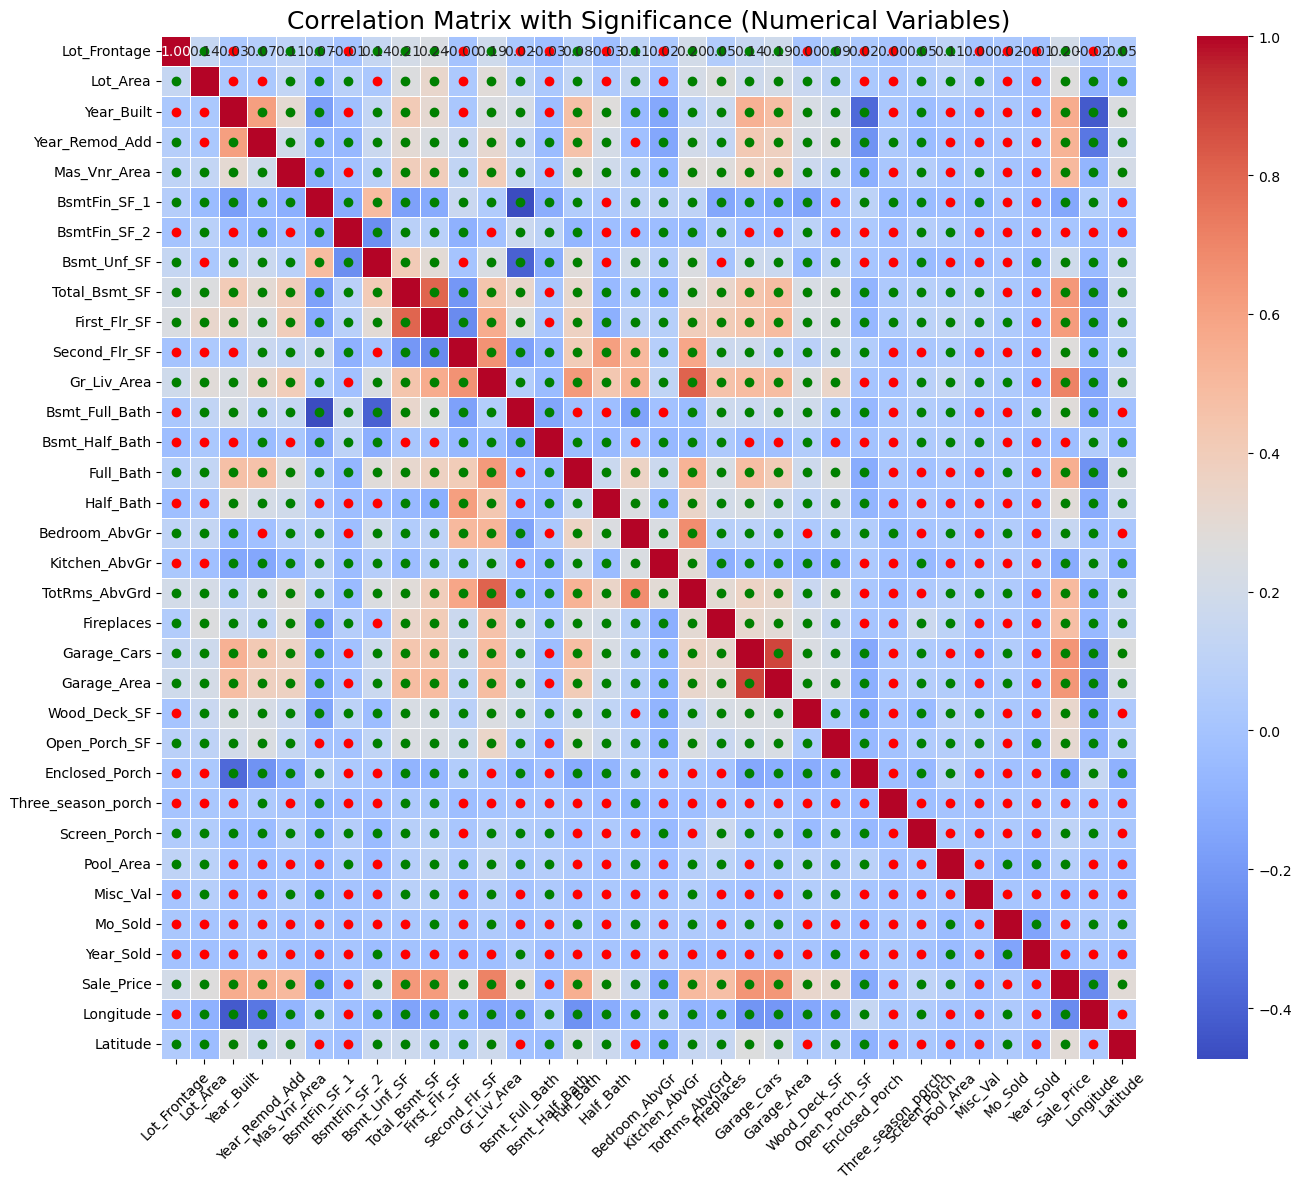

In [49]:
correlation_and_significance(df=df)

## Data Cleaning

### Handling missing values

In [472]:
import pandas as pd
from sklearn.impute import SimpleImputer

def impute_dataframe(df, strategy_num="mean", strategy_cat="most_frequent"):
    """
    Imputes missing values in a DataFrame separately for numerical and categorical columns.

    Parameters:
    df (pd.DataFrame): Input DataFrame.
    strategy_num (str): Strategy for imputing numerical columns (default="mean").
    strategy_cat (str): Strategy for imputing categorical columns (default="most_frequent").

    Returns:
    pd.DataFrame: DataFrame with imputed values.
    """
    df = df.copy()

    # Separate numerical and categorical columns
    num_cols = df.select_dtypes(include=["number"]).columns
    cat_cols = df.select_dtypes(exclude=["number"]).columns

    # Impute numerical columns
    if len(num_cols) > 0:
        num_imputer = SimpleImputer(strategy=strategy_num)
        df[num_cols] = num_imputer.fit_transform(df[num_cols])

    # Impute categorical columns
    if len(cat_cols) > 0:
        cat_imputer = SimpleImputer(strategy=strategy_cat)
        df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

    return df

In [473]:
# Supposons que ton DataFrame s'appelle df
df = df.drop(columns=["Misc_Feature", "Mas_Vnr_Type"])

### Removing duplicates rows


In [474]:
def remove_duplicates(df, subset=None, keep='first', inplace=False):
    """
    Removes duplicate rows from the DataFrame and provides a summary of duplicates.
    Parameters:
        df (pd.DataFrame): The DataFrame from which to remove duplicates.
        subset (list): List of columns to consider for duplicate checking. 
                    If None, checks all columns.
        keep (str): Which duplicates to keep. Options:
            - 'first': Keep the first occurrence (default).
            - 'last': Keep the last occurrence.
            - 'none': Drop all duplicates.
        inplace (bool): If True, modifies the original DataFrame. 
                        If False, returns a new DataFrame.
    Returns:
        pd.DataFrame: DataFrame with duplicates removed (if inplace=False).
    """
    if keep not in ['first', 'last', 'none']:
        raise ValueError("keep must be one of 'first', 'last', or 'none'.")
    # Count duplicates before removal
    total_rows = len(df)
    duplicate_rows = df.duplicated(subset=subset, keep=False).sum()
    percentage_duplicates = (duplicate_rows / total_rows) * 100
    print(f"Total Rows: {total_rows}")
    print(f"Duplicate Rows: {duplicate_rows} ({percentage_duplicates:.2f}%)")
    if duplicate_rows == 0:
        print("No duplicates found. No rows removed.")
        return df if not inplace else None
    # Handle duplicate removal    if keep == 'none':
        # Drop all duplicates and keep only unique rows
        duplicated_mask = df.duplicated(subset=subset, keep=False)
        result = df[~duplicated_mask]
    else:
        # Use pandas built-in drop_duplicates
        result = df.drop_duplicates(subset=subset, keep=keep)
    # Count duplicates after removal
    remaining_rows = len(result)
    rows_removed = total_rows - remaining_rows
    print(f"Rows Removed: {rows_removed}")
    print(f"Remaining Rows: {remaining_rows}")
    if rows_removed > 0:
        print("Duplicates successfully removed.")
    else:
        print("No duplicates were removed.")
    if inplace:
        df.drop_duplicates(subset=subset, keep=keep, inplace=True)
    else:
        return result

In [475]:
dm=remove_duplicates(df)

Total Rows: 2930
Duplicate Rows: 0 (0.00%)
No duplicates found. No rows removed.


### Handles outliers

In [476]:
def handle_outliers(df, numerical_columns=None, method='IQR', verbose=True):
    """
    Handles outliers in continuous numerical variables using the specified method.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to process.
        numerical_columns (list): List of numerical columns to check for outliers. If None, auto-selects all numerical columns.
        method (str): Method to handle outliers ('IQR' or 'Z-Score'). Default is 'IQR'.
        verbose (bool): If True, displays outlier statistics.
        
    Returns:
        pd.DataFrame: DataFrame with outliers handled.
    """
    # Select numerical columns if not provided
    if numerical_columns is None:
        numerical_columns = df.select_dtypes(include=['number']).columns
    # Iterate over each numerical column
    for col in numerical_columns:
        if col in df.columns:
            if method == 'IQR':
                # Calculate Q1, Q3, and IQR
                Q1 = df[col].quantile(0.25)
                Q3 = df[col].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                
                # Count and handle outliers
                outliers = ((df[col] < lower_bound) | (df[col] > upper_bound))
                num_outliers = outliers.sum()
                
                # Option 1: Capping
                df.loc[df[col] < lower_bound, col] = lower_bound
                df.loc[df[col] > upper_bound, col] = upper_bound
                
                if verbose:
                    print(f"[INFO] Outliers handled in '{col}' using IQR:")
                    print(f"         - Number of Outliers: {num_outliers}")
                    print(f"         - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
            elif method == 'Z-Score':
                # Alternative method (if needed)
                mean = df[col].mean()
                std_dev = df[col].std()
                threshold = 3  # Standard deviation threshold
                
                # Count and handle outliers
                outliers = ((df[col] < (mean - threshold * std_dev)) | (df[col] > (mean + threshold * std_dev)))
                num_outliers = outliers.sum()
                
                # Option 1: Capping
                lower_bound = mean - threshold * std_dev
                upper_bound = mean + threshold * std_dev
                df.loc[df[col] < lower_bound, col] = lower_bound
                df.loc[df[col] > upper_bound, col] = upper_bound
                
                if verbose:
                    print(f"[INFO] Outliers handled in '{col}' using Z-Score:")
                    print(f"         - Number of Outliers: {num_outliers}")
                    print(f"         - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    
    return df

In [477]:
dc=handle_outliers(dm, numerical_columns=None, method='IQR', verbose=True)

[INFO] Outliers handled in 'Lot_Frontage' using IQR:
         - Number of Outliers: 31
         - Lower Bound: -9.5, Upper Bound: 130.5
[INFO] Outliers handled in 'Lot_Area' using IQR:
         - Number of Outliers: 127
         - Lower Bound: 1267.75, Upper Bound: 17727.75
[INFO] Outliers handled in 'Year_Built' using IQR:
         - Number of Outliers: 9
         - Lower Bound: 1883.5, Upper Bound: 2071.5
[INFO] Outliers handled in 'Year_Remod_Add' using IQR:
         - Number of Outliers: 0
         - Lower Bound: 1906.5, Upper Bound: 2062.5
[INFO] Outliers handled in 'Mas_Vnr_Area' using IQR:
         - Number of Outliers: 203
         - Lower Bound: -244.125, Upper Bound: 406.875
[INFO] Outliers handled in 'BsmtFin_SF_1' using IQR:
         - Number of Outliers: 0
         - Lower Bound: -3.0, Upper Bound: 13.0
[INFO] Outliers handled in 'BsmtFin_SF_2' using IQR:
         - Number of Outliers: 351
         - Lower Bound: 0.0, Upper Bound: 0.0
[INFO] Outliers handled in 'Bsmt_Unf_S

C:\Users\Client\AppData\Local\Temp\ipykernel_13548\1650182075.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < lower_bound, col] = lower_bound
C:\Users\Client\AppData\Local\Temp\ipykernel_13548\1650182075.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1267.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < lower_bound, col] = lower_bound
C:\Users\Client\AppData\Local\Temp\ipykernel_13548\1650182075.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1883.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < lower_bound, col] = lower_bound
C:

In [478]:
dc

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Pool_QC,Fence,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,130.5,17727.75,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Pool,No_Fence,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.00,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Pool,Minimum_Privacy,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.00,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Pool,No_Fence,0,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.00,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Pool,No_Fence,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.00,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Pool,Minimum_Privacy,0,3,2010,WD,Normal,189900,-93.638933,42.060899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Split_or_Multilevel,Residential_Low_Density,37.0,7937.00,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,CulDSac,...,No_Pool,Good_Privacy,0,3,2006,WD,Normal,142500,-93.604776,41.988964
2926,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0.0,8885.00,Pave,No_Alley_Access,Slightly_Irregular,Low,AllPub,Inside,...,No_Pool,Minimum_Privacy,0,6,2006,WD,Normal,131000,-93.602680,41.988314
2927,Split_Foyer,Residential_Low_Density,62.0,10441.00,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Pool,Minimum_Privacy,0,7,2006,WD,Normal,132000,-93.606847,41.986510
2928,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,77.0,10010.00,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Pool,No_Fence,0,4,2006,WD,Normal,170000,-93.600190,41.990921


### Data type conversions

In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 72 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MS_SubClass         2930 non-null   object 
 1   MS_Zoning           2930 non-null   object 
 2   Lot_Frontage        2930 non-null   float64
 3   Lot_Area            2930 non-null   float64
 4   Street              2930 non-null   object 
 5   Alley               2930 non-null   object 
 6   Lot_Shape           2930 non-null   object 
 7   Land_Contour        2930 non-null   object 
 8   Utilities           2930 non-null   object 
 9   Lot_Config          2930 non-null   object 
 10  Land_Slope          2930 non-null   object 
 11  Neighborhood        2930 non-null   object 
 12  Condition_1         2930 non-null   object 
 13  Condition_2         2930 non-null   object 
 14  Bldg_Type           2930 non-null   object 
 15  House_Style         2930 non-null   object 
 16  Overal

In [480]:
def get_object_columns(df):
    """
    Cette fonction retourne la liste des colonnes de type 'object' dans un DataFrame.
    
    Paramètres :
    df (pd.DataFrame) : Le DataFrame à analyser.
    
    Retour :
    list : Liste des noms de colonnes de type 'object'.
    """
    return df.select_dtypes(include='object').columns.tolist()

# Exemple d'utilisation
# df = pd.read_csv('ton_fichier.csv')
object_columns = get_object_columns(df)
print(len(object_columns), "\n", object_columns)


38 
 ['MS_SubClass', 'MS_Zoning', 'Street', 'Alley', 'Lot_Shape', 'Land_Contour', 'Utilities', 'Lot_Config', 'Land_Slope', 'Neighborhood', 'Condition_1', 'Condition_2', 'Bldg_Type', 'House_Style', 'Overall_Cond', 'Roof_Style', 'Roof_Matl', 'Exterior_1st', 'Exterior_2nd', 'Exter_Cond', 'Foundation', 'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_Type_2', 'Heating', 'Heating_QC', 'Central_Air', 'Electrical', 'Functional', 'Garage_Type', 'Garage_Finish', 'Garage_Cond', 'Paved_Drive', 'Pool_QC', 'Fence', 'Sale_Type', 'Sale_Condition']


In [481]:
def label_encode_columns(df, columns=object_columns, verbose=True):
    """
    Performs Label Encoding on specified categorical columns.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to encode.
        columns (list): List of column names to be label encoded.
        verbose (bool): If True, displays the label mappings.
        
    Returns:
        pd.DataFrame: DataFrame with encoded columns.
    """
    # Loop through the specified columns and encode them
    for col in columns:
        if col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            
            # Display label mapping
            if verbose:
                mapping = dict(zip(le.classes_, le.transform(le.classes_)))
                print(f"\n[INFO] Label Encoding for '{col}': {mapping}")
        else:
            print(f"[WARNING] Column '{col}' not found in DataFrame.")
    
    return df

In [482]:
dc=label_encode_columns(dc, columns=object_columns, verbose=True)


[INFO] Label Encoding for 'MS_SubClass': {'Duplex_All_Styles_and_Ages': 0, 'One_Story_1945_and_Older': 1, 'One_Story_1946_and_Newer_All_Styles': 2, 'One_Story_PUD_1946_and_Newer': 3, 'One_Story_with_Finished_Attic_All_Ages': 4, 'One_and_Half_Story_Finished_All_Ages': 5, 'One_and_Half_Story_PUD_All_Ages': 6, 'One_and_Half_Story_Unfinished_All_Ages': 7, 'PUD_Multilevel_Split_Level_Foyer': 8, 'Split_Foyer': 9, 'Split_or_Multilevel': 10, 'Two_Family_conversion_All_Styles_and_Ages': 11, 'Two_Story_1945_and_Older': 12, 'Two_Story_1946_and_Newer': 13, 'Two_Story_PUD_1946_and_Newer': 14, 'Two_and_Half_Story_All_Ages': 15}

[INFO] Label Encoding for 'MS_Zoning': {'A_agr': 0, 'C_all': 1, 'Floating_Village_Residential': 2, 'I_all': 3, 'Residential_High_Density': 4, 'Residential_Low_Density': 5, 'Residential_Medium_Density': 6}

[INFO] Label Encoding for 'Street': {'Grvl': 0, 'Pave': 1}

[INFO] Label Encoding for 'Alley': {'Gravel': 0, 'No_Alley_Access': 1, 'Paved': 2}

[INFO] Label Encoding for 

In [483]:
dc

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Pool_QC,Fence,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,2,5,130.5,17727.75,1,1,3,3,0,0,...,3,4,0,5,2010,9,4,215000,-93.619754,42.054035
1,2,4,80.0,11622.00,1,1,2,3,0,4,...,3,2,0,6,2010,9,4,105000,-93.619756,42.053014
2,2,5,81.0,14267.00,1,1,3,3,0,0,...,3,4,0,6,2010,9,4,172000,-93.619387,42.052659
3,2,5,93.0,11160.00,1,1,2,3,0,0,...,3,4,0,4,2010,9,4,244000,-93.617320,42.051245
4,13,5,74.0,13830.00,1,1,3,3,0,4,...,3,2,0,3,2010,9,4,189900,-93.638933,42.060899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,10,5,37.0,7937.00,1,1,3,3,0,1,...,3,0,0,3,2006,9,4,142500,-93.604776,41.988964
2926,2,5,0.0,8885.00,1,1,3,2,0,4,...,3,2,0,6,2006,9,4,131000,-93.602680,41.988314
2927,9,5,62.0,10441.00,1,1,2,3,0,4,...,3,2,0,7,2006,9,4,132000,-93.606847,41.986510
2928,2,5,77.0,10010.00,1,1,2,3,0,4,...,3,4,0,4,2006,9,4,170000,-93.600190,41.990921


In [484]:
dc.columns

Index(['MS_SubClass', 'MS_Zoning', 'Lot_Frontage', 'Lot_Area', 'Street',
       'Alley', 'Lot_Shape', 'Land_Contour', 'Utilities', 'Lot_Config',
       'Land_Slope', 'Neighborhood', 'Condition_1', 'Condition_2', 'Bldg_Type',
       'House_Style', 'Overall_Cond', 'Year_Built', 'Year_Remod_Add',
       'Roof_Style', 'Roof_Matl', 'Exterior_1st', 'Exterior_2nd',
       'Mas_Vnr_Area', 'Exter_Cond', 'Foundation', 'Bsmt_Cond',
       'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_SF_1', 'BsmtFin_Type_2',
       'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF', 'Heating', 'Heating_QC',
       'Central_Air', 'Electrical', 'First_Flr_SF', 'Second_Flr_SF',
       'Gr_Liv_Area', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath',
       'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'TotRms_AbvGrd',
       'Functional', 'Fireplaces', 'Garage_Type', 'Garage_Finish',
       'Garage_Cars', 'Garage_Area', 'Garage_Cond', 'Paved_Drive',
       'Wood_Deck_SF', 'Open_Porch_SF', 'Enclosed_Porch', 'Three_season_po

## feature eng 

In [485]:
mean_sales= dc["Sale_Price"].mean()
max_sales= dc["Sale_Price"].max()
min_sales= dc["Sale_Price"].min()
std_sales = dc["Sale_Price"].std()
dc["Mean_Sale_Price"] = mean_sales
dc["Max_Sale_Price"] = max_sales
dc["Min_Sale_Price"] = min_sales
dc["Std_Sale_Price"] = std_sales


In [486]:
dc["Total_Bathrooms"] = dc["Bsmt_Full_Bath"] + dc["Full_Bath"] + 0.5 * (dc["Bsmt_Half_Bath"] + dc["Half_Bath"])
dc["Total_Living_Area"] = dc["Gr_Liv_Area"] + dc["Total_Bsmt_SF"]
dc["Land_Living_Ratio"] = dc["Lot_Area"] / dc["Total_Living_Area"]
dc["Room_Density"] = dc["Total_Living_Area"] / dc["TotRms_AbvGrd"]
dc["Has_Garage"] = dc["Garage_Area"].apply(lambda x: 1 if x > 0 else 0)
dc["Garage_Size_Per_Car"] = dc["Garage_Area"] / (dc["Garage_Cars"] + 1)
dc["Total_Porch_Area"] = dc["Wood_Deck_SF"] + dc["Open_Porch_SF"] + dc["Enclosed_Porch"] + dc["Screen_Porch"] + dc["Three_season_porch"]
expensive_neighborhoods = dc.groupby("Neighborhood")["Sale_Price"].median().sort_values(ascending=False).head(5).index
dc["High_Value_Neighborhood"] = dc["Neighborhood"].apply(lambda x: 1 if x in expensive_neighborhoods else 0)
dc["Has_Paved_Drive"] = dc["Paved_Drive"].map({"Y": 1, "N": 0})
dc["Lot_Area_Log"] = np.log1p(dc["Lot_Area"])
dc["Sale_Price_Log"] = np.log1p(dc["Sale_Price"])
dc["Gr_Liv_Area_Log"] = np.log1p(dc["Gr_Liv_Area"])
dc["House_Age"] = dc["Year_Sold"] - dc["Year_Built"]

In [498]:
cos_price_sales= np.cos(dc["Sale_Price_Log"])
sin_price_sale= np.sin(dc["Sale_Price_Log"])
dc["cos_price_sales"]=cos_price_sales
dc["sin_price_sale"]=sin_price_sale

In [499]:
cols_used = [
    "Bsmt_Full_Bath", "Full_Bath", "Bsmt_Half_Bath", "Half_Bath",  # Utilisés dans Total_Bathrooms
    "Gr_Liv_Area", "Total_Bsmt_SF",  # Utilisés dans Total_Living_Area
    "Lot_Area", "Total_Living_Area",  # Utilisés dans Land_Living_Ratio
    "Total_Living_Area", "TotRms_AbvGrd",  # Utilisés dans Room_Density
    "Garage_Area",  # Utilisé dans Has_Garage et Garage_Size_Per_Car
    "Garage_Cars",  # Utilisé dans Garage_Size_Per_Car
    "Wood_Deck_SF", "Open_Porch_SF", "Enclosed_Porch", "Screen_Porch", "Three_season_porch",  # Utilisés dans Total_Porch_Area
    "Neighborhood",  # Utilisé dans High_Value_Neighborhood
    "Paved_Drive",  # Utilisé dans Has_Paved_Drive
    "Lot_Area",  # Transformé avec Lot_Area_Log
    "Gr_Liv_Area",  # Transformé avec Gr_Liv_Area_Log
    "Year_Built", "Year_Sold"  # Utilisés dans House_Age
]
cols_useless = ['Has_Paved_Drive'
]
cols_to_drop = cols_used + cols_useless
dc.drop(columns=cols_to_drop, inplace=True, errors='ignore')


## model 

### Target Variable

In [500]:
print(dc.columns)


Index(['MS_SubClass', 'MS_Zoning', 'Lot_Frontage', 'Street', 'Alley',
       'Lot_Shape', 'Land_Contour', 'Utilities', 'Lot_Config', 'Land_Slope',
       'Condition_1', 'Condition_2', 'Bldg_Type', 'House_Style',
       'Overall_Cond', 'Year_Remod_Add', 'Roof_Style', 'Roof_Matl',
       'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Area', 'Exter_Cond',
       'Foundation', 'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1',
       'BsmtFin_SF_1', 'BsmtFin_Type_2', 'BsmtFin_SF_2', 'Bsmt_Unf_SF',
       'Heating', 'Heating_QC', 'Central_Air', 'Electrical', 'First_Flr_SF',
       'Second_Flr_SF', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Functional',
       'Fireplaces', 'Garage_Type', 'Garage_Finish', 'Garage_Cond',
       'Pool_Area', 'Pool_QC', 'Fence', 'Misc_Val', 'Mo_Sold', 'Sale_Type',
       'Sale_Condition', 'Sale_Price', 'Longitude', 'Latitude',
       'Mean_Sale_Price', 'Max_Sale_Price', 'Min_Sale_Price', 'Std_Sale_Price',
       'Total_Bathrooms', 'Land_Living_Ratio', 'Room_Density', 'Has_Garag

In [501]:
from sklearn.model_selection import train_test_split
x= dc.drop(columns='Sale_Price_Log')
y= dc['Sale_Price_Log']

### data split 

In [502]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=20)

### Pipeline

In [504]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform only the selected columns
x_train = scaler.fit_transform(x_train)
x_test  = scaler.fit_transform(x_test)
#x_t[columns_to_scale] = scaler.fit_transform(x_t[columns_to_scale])
#x_te[columns_to_scale] = scaler.fit_transform(x_te[columns_to_scale])

In [505]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import time
import numpy as np

In [506]:
dc.isna().sum()

MS_SubClass        0
MS_Zoning          0
Lot_Frontage       0
Street             0
Alley              0
                  ..
Sale_Price_Log     0
Gr_Liv_Area_Log    0
House_Age          0
cos_price_sales    0
sin_price_sale     0
Length: 70, dtype: int64

### LinearRegression

In [507]:
# Initialize Linear Regression model
lr = LinearRegression()

# Timing the training process
training_start = time.perf_counter()
model = lr.fit(x_train, y_train)
training_end = time.perf_counter()

# Timing the prediction process
prediction_start = time.perf_counter()
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
prediction_end = time.perf_counter()

# Calculate KPIs
# Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test , y_pred_test)

# R-squared score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Time metrics
train_time = training_end - training_start
prediction_time = prediction_end - prediction_start


In [508]:
# Output metrics
print("Linear Regression Model Performance:")
print("\nTraining Set:")
print(f"  - RMSE: {rmse_train:.4f}")
print(f"  - MAE: {mae_train:.4f}")
print(f"  - R^2 Score: {r2_train:.4f}")
print(f"  - Training Time: {train_time:.4f} seconds")

print("\nTesting Set:")
print(f"  - RMSE: {rmse_test:.4f}")
print(f"  - MAE: {mae_test:.4f}")
print(f"  - R^2 Score: {r2_test:.4f}")
print(f"  - Prediction Time: {prediction_time:.5f} seconds")

Linear Regression Model Performance:

Training Set:
  - RMSE: 0.0030
  - MAE: 0.0020
  - R^2 Score: 0.9999
  - Training Time: 0.1721 seconds

Testing Set:
  - RMSE: 0.0571
  - MAE: 0.0219
  - R^2 Score: 0.9810
  - Prediction Time: 0.00600 seconds


In [510]:
print(np.exp(y_test.mean()))
print(np.exp(y_test.std()))

162842.63499267888
1.5135427826952261


Si on ramène RMSE (0.0571) à l'échelle de la variable cible (162842.63), cela signifie que les prédictions du modèle s'écartent en moyenne de 0.0571 / 162842.63 ≈ 0.000035%, ce qui est extrêmement précis.

Conclusion :

Le modèle est extrêmement précis mais peut être trop ajusté aux données d'entraînement.
Si l’objectif est d’éviter l’overfitting, il faudrait tester des techniques comme la régularisation ou l’ajout de bruit dans l’entraînement

### Ridge and Lasso regression



#### Cross Validation

In [517]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


# Define models and parameter grids for GridSearchCV
ridge = Ridge()
lasso = Lasso()

ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100,200,300,400,500]}
ridge_grid = GridSearchCV(estimator=ridge, param_grid=ridge_params, 
                        cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# Lasso Regression Hypertuning
lasso_grid = GridSearchCV(estimator=lasso, param_grid=lasso_params, 
                        cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

#### Ridge and Lasso Regression

In [518]:
ridge_grid.fit(x_train, y_train)
best_ridge = ridge_grid.best_estimator_
print("\nBest Ridge Model:", ridge_grid.best_params_)


lasso_grid.fit(x_train, y_train)
best_lasso = lasso_grid.best_estimator_
print("\nBest Lasso Model:", lasso_grid.best_params_)


Best Ridge Model: {'alpha': 0.01}

Best Lasso Model: {'alpha': 0.01}


In [ ]:
# Evaluate the best models
best_models = {'Ridge': best_ridge, 'Lasso': best_lasso}

for model_name, model in best_models.items():
    print(f"\nEvaluating {model_name} Model:")

    # Timing the training process
    training_start = time.perf_counter()
    model.fit(x_train, y_train)
    training_end = time.perf_counter()
    
    # Timing the prediction process
    prediction_start = time.perf_counter()
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    prediction_end = time.perf_counter()

    # Calculate KPIs
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # Time metrics
    train_time = training_end - training_start
    prediction_time = prediction_end - prediction_start
    # Output metrics
    print("\nTraining Set:")
    print(f"  - RMSE: {rmse_train:.4f}")
    print(f"  - MAE: {mae_train:.4f}")
    print(f"  - R^2 Score: {r2_train:.4f}")
    print(f"  - Training Time: {train_time:.4f} seconds")

    print("\nTesting Set:")
    print(f"  - RMSE: {rmse_test:.4f}")
    print(f"  - MAE: {mae_test:.4f}")
    print(f"  - R^2 Score: {r2_test:.4f}")
    print(f"  - Prediction Time: {prediction_time:.5f} seconds")


Evaluating Ridge Model:

Training Set:
  - RMSE: 0.0030
  - MAE: 0.0020
  - R^2 Score: 0.9999
  - Training Time: 0.0870 seconds

Testing Set:
  - RMSE: 0.0571
  - MAE: 0.0219
  - R^2 Score: 0.9810
  - Prediction Time: 0.00212 seconds

Evaluating Lasso Model:

Training Set:
  - RMSE: 0.0110
  - MAE: 0.0085
  - R^2 Score: 0.9992
  - Training Time: 0.0349 seconds

Testing Set:
  - RMSE: 0.0679
  - MAE: 0.0293
  - R^2 Score: 0.9731
  - Prediction Time: 0.00164 seconds
